In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import time

In [2]:
def barplot_for_predict(pred:list,tar:list)->'pass':
    width = 0.35
    x = np.arange(len(list(tar)))
    labels = list(map(str, x))
    fig, ax = plt.subplots(figsize=([17,4]))
    rects1 = ax.bar(x - width/2, pred, width, color='#107003', label='Predict')
    rects2 = ax.bar(x + width/2, tar, width, color='#93c892', label='Target')
    plt.xticks(x, labels)
    plt.grid(linestyle='-.', linewidth=.5)
    ax.set_ylabel('Предсказываемое значение')
    ax.set_xlabel('Номер звезды')
    ax.set_title('Предсказание и целевой показатель')
    ax.legend()
    plt.show()
    pass

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Загрузка данных

In [3]:
df = pd.read_csv('/datasets/6_class.csv').drop('Unnamed: 0', axis=1)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,8829,537493.000000,1423.0000,-10.73,5,White
238,9235,404940.000000,1112.0000,-11.23,5,White


## Предобработка и анализ данных

In [4]:
# Дублей нет
df.duplicated().sum()

0

In [5]:
#Пустых данных в столбцах нет
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [7]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


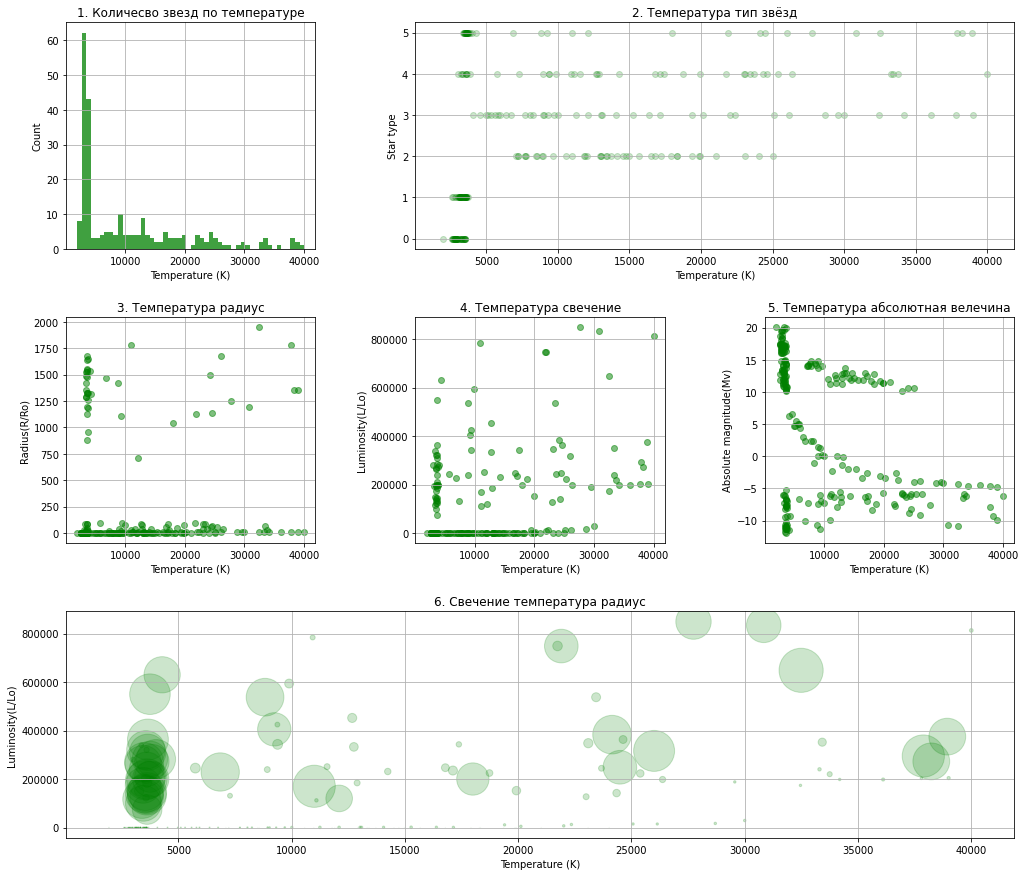

In [8]:
fig = plt.figure(figsize=([17,15]))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)


g1 = plt.subplot(grid[0, 0])
g2 = plt.subplot(grid[0, 1:])
g3 = plt.subplot(grid[1, 0])
g4 = plt.subplot(grid[1, 1])
g5 = plt.subplot(grid[1, 2])
g6 = plt.subplot(grid[2, 0:])


g1.hist(df['Temperature (K)'], 50, facecolor='g', alpha=0.75)
g1.grid(True)
g1.set_xlabel('Temperature (K)')
g1.set_ylabel('Count')
g1.set_title('1. Количесво звезд по температуре')

g2.scatter(df['Temperature (K)'], df['Star type'], edgecolors='g', c="g", alpha=0.2)
g2.grid(True)
g2.set_xlabel('Temperature (K)')
g2.set_ylabel('Star type')
g2.set_title('2. Температура тип звёзд')

g3.scatter(df['Temperature (K)'], df['Radius(R/Ro)'], edgecolors='g', c="g", alpha=0.5)
g3.grid(True)
g3.set_xlabel('Temperature (K)')
g3.set_ylabel('Radius(R/Ro)')
g3.set_title('3. Температура радиус')

g4.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], edgecolors='g', c="g", alpha=0.5)
g4.grid(True)
g4.set_xlabel('Temperature (K)')
g4.set_ylabel('Luminosity(L/Lo)')
g4.set_title('4. Температура свечение')

g5.scatter(df['Temperature (K)'], df['Absolute magnitude(Mv)'], edgecolors='g', c="g", alpha=0.5)
g5.grid(True)
g5.set_xlabel('Temperature (K)')
g5.set_ylabel('Absolute magnitude(Mv)')
g5.set_title('5. Температура абсолютная велечина')

g6.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], s=df['Radius(R/Ro)'], edgecolors='g', c="g", alpha=0.2)
g6.grid(True)
g6.set_xlabel('Temperature (K)')
g6.set_ylabel('Luminosity(L/Lo)')
g6.set_title('6. Свечение температура радиус')
print()

In [9]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


Из таблицы корреляций видно, что температура не имеет сильной связи с другими параметрами звезд.

## Вывод
Нельзя точно сказать от чего зависит температура звезды но:  
#### На графиках видно:
1. Большая часть звёзд находится в диапозоне до 100 000 кельвинов
2. Наименьшую температуру имеют звезды 0 и 1 - го типа
3. Звезды разных радиусов имеют разную температуру, но в основном чем меньше радиус тем меньше температура
4. Яркие звезды чаще горячее менее ярких звезд
5. Температура и обсолютная велечина не очень связаны между собой
6. Размер звезды в совокупности с яркостью не очень сильно влияет на температуру

In [11]:
# Исследую Star color. Видим что там разный регистр приведем всё к нижнему
df['Star color'].unique()
df['Star color'] = df['Star color'].str.lower()
#Посомтрим размер категорий
print(f"Количесво признаков:\n{df['Star color'].value_counts()}, \n\nПроценты признаков:\n{df['Star color'].value_counts(normalize=True)*100}")

Количесво признаков:
red                   112
blue                   55
blue-white             27
blue white             13
white                  10
yellow-white            8
yellowish               3
yellowish white         3
orange                  2
whitish                 2
blue                    1
blue white              1
white-yellow            1
orange-red              1
pale yellow orange      1
Name: Star color, dtype: int64, 

Проценты признаков:
red                   46.666667
blue                  22.916667
blue-white            11.250000
blue white             5.416667
white                  4.166667
yellow-white           3.333333
yellowish              1.250000
yellowish white        1.250000
orange                 0.833333
whitish                0.833333
blue                   0.416667
blue white             0.416667
white-yellow           0.416667
orange-red             0.416667
pale yellow orange     0.416667
Name: Star color, dtype: float64


Перекос в балансе классов не будем брать в обучение.

In [12]:
# Баланс классов в Star type нам подходит
print(f"Количесво признаков:\n{df['Star type'].value_counts()}, \n\nПроценты признаков:\n{df['Star type'].value_counts(normalize=True)*100}")

Количесво признаков:
0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64, 

Проценты признаков:
0    16.666667
1    16.666667
2    16.666667
3    16.666667
4    16.666667
5    16.666667
Name: Star type, dtype: float64


In [13]:
# Получим категориальные признаки
col=[]
col.append('Star type')
col

['Star type']

In [14]:
# Разделим выборки на тестовые и тренировочные
features = df.drop(['Temperature (K)', 'Star color'], axis=1)
target = df['Temperature (K)']

# Применим OHE 
model_OHE = ColumnTransformer(
    [('ohe', OneHotEncoder(), col)],
    remainder = 'passthrough'
    )

dummified = model_OHE.fit_transform(features)
features = pd.DataFrame(dummified)


pt_features_train, pt_features_test, pt_target_train, pt_target_test = train_test_split(features,
                                                                                        target,
                                                                                        test_size=0.4,
                                                                                        random_state=12345)

pt_features_test, pt_features_valid, pt_target_test, pt_target_valid = train_test_split(pt_features_test,
                                                                                        pt_target_test,
                                                                                        test_size=0.5,
                                                                                        random_state=12345)

# Нормализуем все численные признаки
scaler = StandardScaler()
scaler.fit(pt_features_train)

pt_features_train = scaler.transform(pt_features_train)
pt_features_test = scaler.transform(pt_features_test)
pt_features_valid = scaler.transform(pt_features_valid)


## Построение базовой нейронной сети

In [15]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.act3 = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        x = self.act3(x)
        return x
    
net = Net(9,11,7,1)
X_train = torch.Tensor(pt_features_train)
y_train = torch.Tensor(pt_target_train)

X_test = torch.Tensor(pt_features_test)
y_test = torch.Tensor(pt_target_test.values)

res = net.forward(X_train)

#loss = nn.L1Loss()
mse = nn.MSELoss()
RMSE = torch.sqrt(mse(res.flatten(), y_train))
RMSE2 = torch.sqrt(mse(res, y_train))
print(RMSE,':' , RMSE2)

tensor(13685.1367, grad_fn=<SqrtBackward0>) : tensor(13685.1230, grad_fn=<SqrtBackward0>)


/opt/conda/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


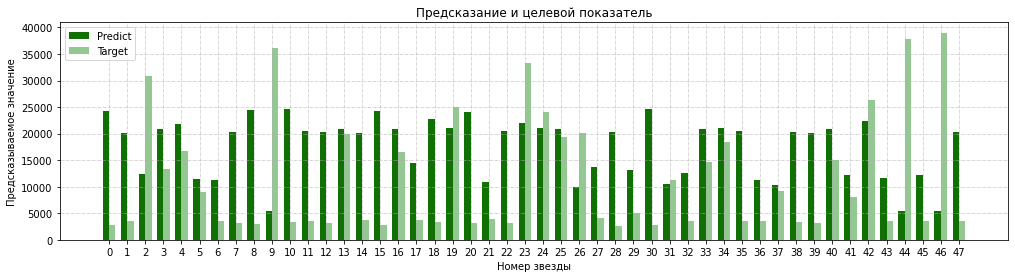

In [16]:
net.eval()
test_preds = net.forward(X_test)*100000
test_preds_list = sum(test_preds.tolist(), [])
barplot_for_predict(test_preds_list,y_test.tolist())

In [19]:
test_preds.data.numpy(),y_test.data.numpy()

(array([[24178.826],
        [20084.758],
        [12329.642],
        [20883.885],
        [21731.963],
        [11377.078],
        [11236.259],
        [20271.117],
        [24441.533],
        [ 5514.087],
        [24695.566],
        [20447.596],
        [20219.021],
        [20957.473],
        [20154.283],
        [24202.633],
        [20931.535],
        [14546.324],
        [22774.97 ],
        [20993.287],
        [24079.91 ],
        [10809.957],
        [20558.41 ],
        [21948.562],
        [20994.732],
        [20944.248],
        [10000.459],
        [13706.515],
        [20360.453],
        [13154.907],
        [24646.148],
        [10415.098],
        [12493.693],
        [20884.342],
        [20963.127],
        [20505.29 ],
        [11320.606],
        [10255.999],
        [20308.057],
        [20192.332],
        [20915.484],
        [12254.934],
        [22340.646],
        [11729.057],
        [ 5456.94 ],
        [12277.958],
        [ 5479.005],
        [2022

На данный момент видно, что модель предсказывает чуть хуже чем никак

## Шаг 5. Улучшение сети

Тут создам класс и функцию с нейронкой за skorch спасибо, но его изучать надо.

In [277]:

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=0.8)
        self.act1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.dp2 = nn.Dropout(p=0.1)

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.act3 = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.dp2(x)

        x = self.fc3(x)
        x = self.act3(x)
        
        return x
def neural_network(n0:int, n1:int, n2:int, nout:int, e:int, x_tr:'tentor', y_tr:'tentor', x_te:'tentor', y_te:'tentor')->'tuple':

    t_start = time.monotonic()
    n0 = x_tr.size()[1]
    nout = 1
    net = Net(n0,n1,n2,nout)
    loss = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    num_epochs = e
    
    preds = net.forward(X_train).flatten()
    RMSE_loss = torch.sqrt(loss(preds, y_train))
    
    best_RMSE = RMSE_loss
    best_epoch = 0
    best_model = 1
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = net.forward(X_train).flatten()
        RMSE_loss = torch.sqrt(loss(preds, y_train))
        RMSE_loss.backward()
        if best_RMSE > RMSE_loss:
            best_RMSE = RMSE_loss
            best_epoch = epoch
            best_model = net
        optimizer.step()
    t_stop = time.monotonic()
    j_time = t_stop - t_start
    return (best_RMSE.tolist(), n1, n2, best_epoch, j_time, best_model)

   

In [ ]:
list(range(1,5002, 1000))

Тут расчеты на долго ))

In [278]:
#a = neural_network(9,1000,500,1,100, X_train, y_train, X_test, y_test)
X_train = torch.Tensor(pt_features_train)
y_train = torch.Tensor(pt_target_train)

X_test = torch.Tensor(pt_features_test)
y_test = torch.Tensor(pt_target_test.values)

result_list = []
n1_r = range(1,1002, 500)
n2_r = range(1, 1002, 500)
e_r = range(1,5002, 2000)

for n1_i in n1_r:
    for n2_i in n2_r:
        for e_i in e_r:
            a = neural_network(9,n1_i,n2_i,1,e_i, X_train, y_train, X_test, y_test)
            result_list.append(a)
    print(n1_i)
result_list

1
501
1001


[(13684.638671875,
  1,
  1,
  0,
  0.0030040270648896694,
  Net(
    (fc1): Linear(in_features=9, out_features=1, bias=True)
    (dp1): Dropout(p=0.8, inplace=False)
    (act1): ReLU()
    (fc2): Linear(in_features=1, out_features=1, bias=True)
    (bn2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dp2): Dropout(p=0.1, inplace=False)
    (fc3): Linear(in_features=1, out_features=1, bias=True)
    (act3): ReLU()
  )),
 (13673.9189453125,
  1,
  1,
  1997,
  9.783591341925785,
  Net(
    (fc1): Linear(in_features=9, out_features=1, bias=True)
    (dp1): Dropout(p=0.8, inplace=False)
    (act1): ReLU()
    (fc2): Linear(in_features=1, out_features=1, bias=True)
    (bn2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dp2): Dropout(p=0.1, inplace=False)
    (fc3): Linear(in_features=1, out_features=1, bias=True)
    (act3): ReLU()
  )),
 (13685.26171875, 1, 1, 0, 18.096508984919637, 1),
 (13685.1376953125,
  1,


## Выводы

Посмотрим на лучшие результаты

In [300]:
result_df = pd.DataFrame(result_list).loc[::,:4]
result_df.sort_values(0)

,0,1,2,3,4
26,3614.674072,1001,1001,3410,135.411245
23,3684.959717,1001,501,3918,95.889696
17,3689.652344,501,1001,3904,105.897412
14,4004.412598,501,501,3999,56.796274
25,4498.012695,1001,1001,2000,63.904536
16,4884.589844,501,1001,1919,45.193219
22,7749.401367,1001,501,1983,89.891950
13,7770.607910,501,501,1992,28.013844
8,8163.075684,1,1001,3263,30.411929
7,8979.137695,1,1001,1995,16.098366


Лучшая модель под индексом 26 получилась с результатом RMSE 3614.674072 и количеством нейронов в первом слое 1001 во втором слое 1001 на эпохе 3410 была выполнена за 135 секунд.

### Посмотрим, что она предсказала и на вывод таблицы план факт

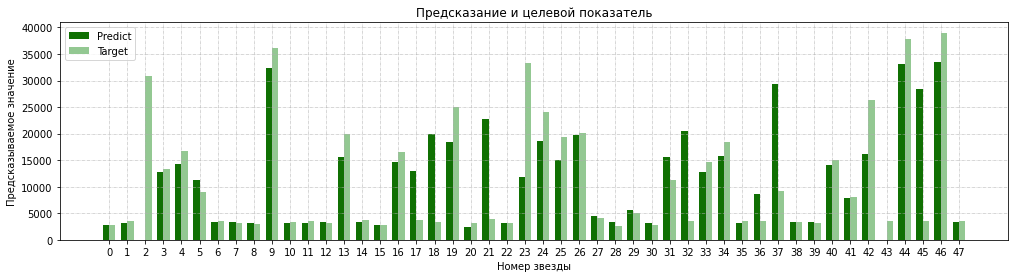

In [299]:
best_m = pd.DataFrame(result_list).loc[26,5]
best_m.eval()
test_preds = best_m.forward(X_test)
test_preds_list = sum(test_preds.tolist(), [])
barplot_for_predict(test_preds_list,y_test.tolist())

In [303]:
test_preds.flatten()

tensor([ 2751.2615,  3170.9189,     0.0000, 12737.9883, 14267.1895, 11257.4453,
         3260.4573,  3438.3728,  3103.8943, 32429.7012,  3221.1946,  3211.5112,
         3422.4387, 15557.2363,  3385.7048,  2802.5784, 14628.6250, 12948.8838,
        19834.1035, 18443.7480,  2476.8999, 22791.1973,  3159.1382, 11744.3232,
        18612.5059, 15093.2891, 19793.6289,  4562.0435,  3373.7729,  5575.6636,
         3204.0322, 15570.2451, 20396.7695, 12762.8604, 15752.4688,  3083.1199,
         8577.0059, 29427.4648,  3424.1333,  3409.6880, 14038.3711,  7908.9224,
        16086.4424,     0.0000, 33147.4805, 28324.7441, 33510.8945,  3424.1860],
       grad_fn=<ReshapeAliasBackward0>)

Похоже на правду можно сказать, что модель справилась.